### In vitro pseudotime comparison


In [30]:
import scanpy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

In [2]:
adata = sc.read_h5ad("dt_out/2_invitro_analysis/combined_adata_from_filtered_h5_withBasicQCregressout_PAGA_preprocessed_12Feb2025.h5ad")

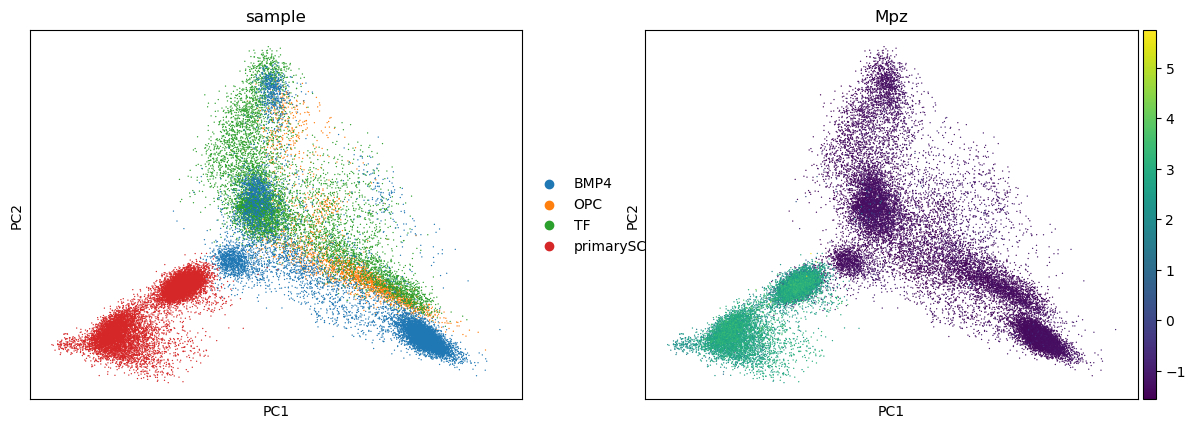

In [3]:
sc.pl.pca(adata,color=["sample", 'Mpz'])

In [4]:
bmp4 = pd.read_csv("dt_out/2_invitro_analysis/BMP4_SC_filtered_feature_bc_matrix_scvelo_preprocessed_7Feb2025_obs.csv", index_col = 0)
tf = pd.read_csv("dt_out/2_invitro_analysis/TF_SC_filtered_feature_bc_matrix_scvelo_preprocessed_7Feb2025_obs.csv", index_col = 0)

In [5]:
bmp4['cell'] = bmp4.index.values + bmp4['sample_batch']
tf['cell'] = tf.index.values + tf['sample_batch']


In [6]:
# adata.obs = 
adata.obs['cell'] = adata.obs.index.values
adata.obs['cell_sample'] = adata.obs['cell'] + "_" + adata.obs['sample'].astype(str)

In [7]:
bmp4.index = bmp4['cell']
tf.index = tf['cell']
bmp4['cell_sample'] = bmp4['cell'] + "_BMP4"
tf['cell_sample'] = tf['cell'] + "_TF"
velo = pd.concat([bmp4[['velocity_pseudotime','cell_sample']],tf[['velocity_pseudotime','cell_sample']]],axis=0)


In [8]:
velo

,velocity_pseudotime,cell_sample
cell,,
AAACCCAAGTCTAACC-1,0.966971,AAACCCAAGTCTAACC-1_BMP4
AAACCCACACAATCTG-1,0.284465,AAACCCACACAATCTG-1_BMP4
AAACCCACACCACTGG-1,0.489326,AAACCCACACCACTGG-1_BMP4
AAACCCACAGAAATTG-1,0.496857,AAACCCACAGAAATTG-1_BMP4
AAACCCATCCGAGAAG-1,0.496861,AAACCCATCCGAGAAG-1_BMP4
...,...,...
TTTGTTGCACTGTCCT-1,0.212011,TTTGTTGCACTGTCCT-1_TF
TTTGTTGGTCATCCGG-1,0.166289,TTTGTTGGTCATCCGG-1_TF
TTTGTTGGTTCTAAGC-1,0.913343,TTTGTTGGTTCTAAGC-1_TF


In [9]:
adata.obs = adata.obs.merge(velo, left_on="cell_sample", right_on="cell_sample", how='left',sort=False)

In [10]:
adata.obs.index = adata.obs['cell']

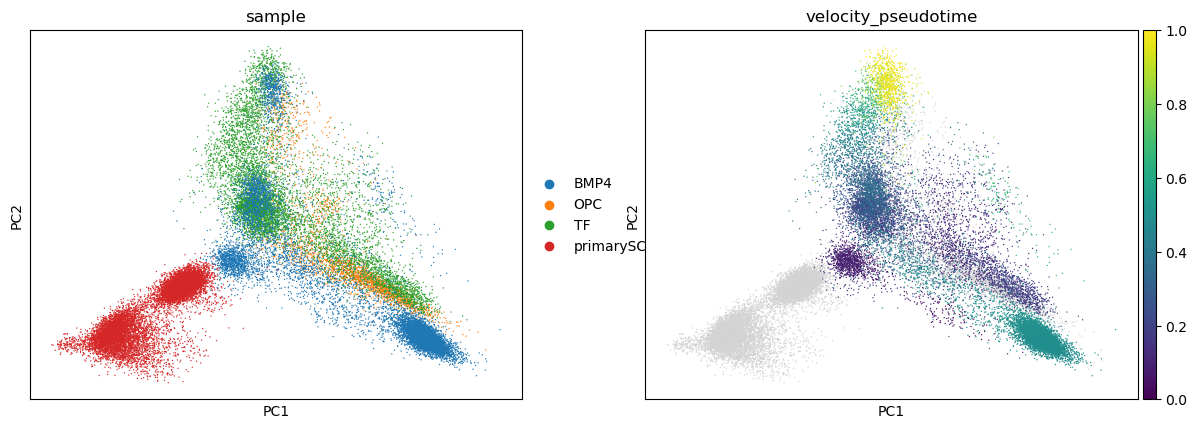

In [11]:
sc.pl.pca(adata,color = ["sample",'velocity_pseudotime'])

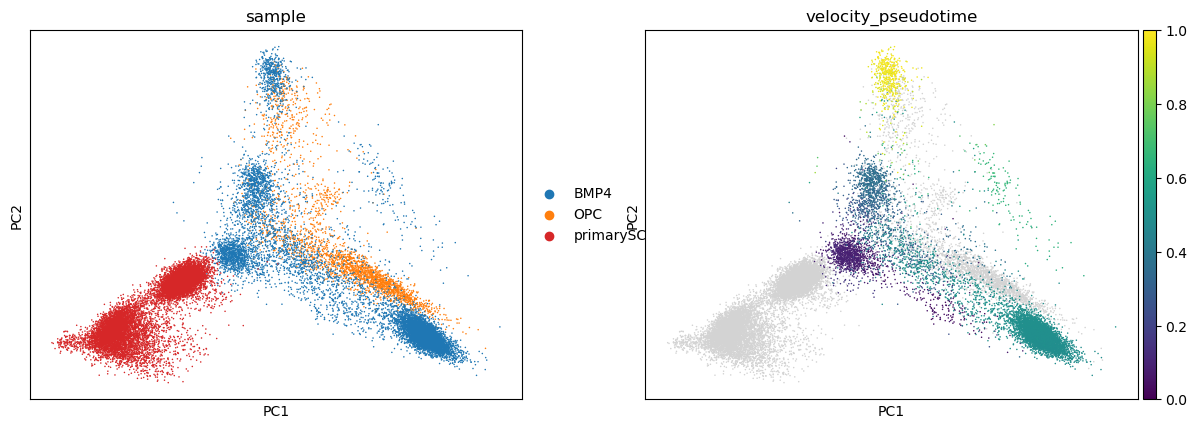

In [19]:
sc.pl.pca(adata[adata.obs['sample'] != "TF"],color = ["sample",'velocity_pseudotime'])

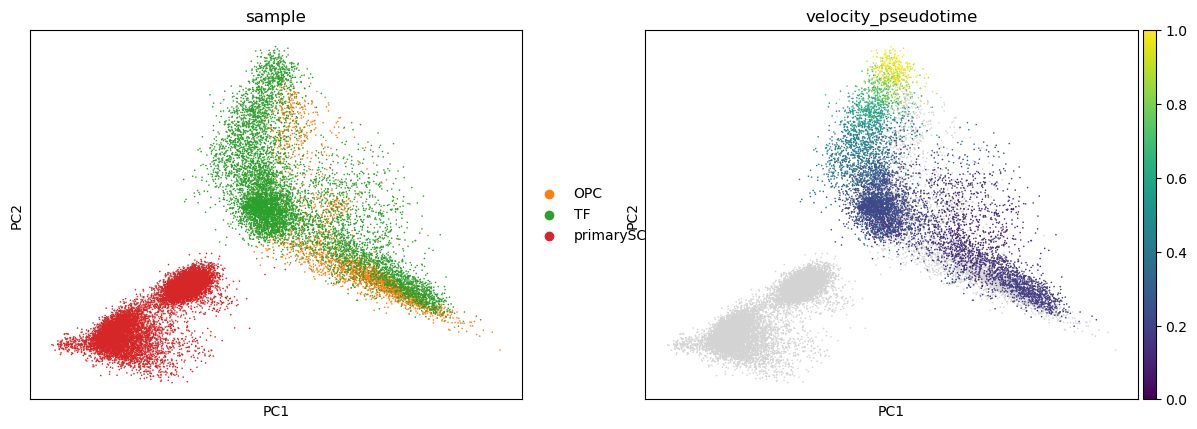

In [20]:
sc.pl.pca(adata[adata.obs['sample'] != "BMP4"],color = ["sample",'velocity_pseudotime'])

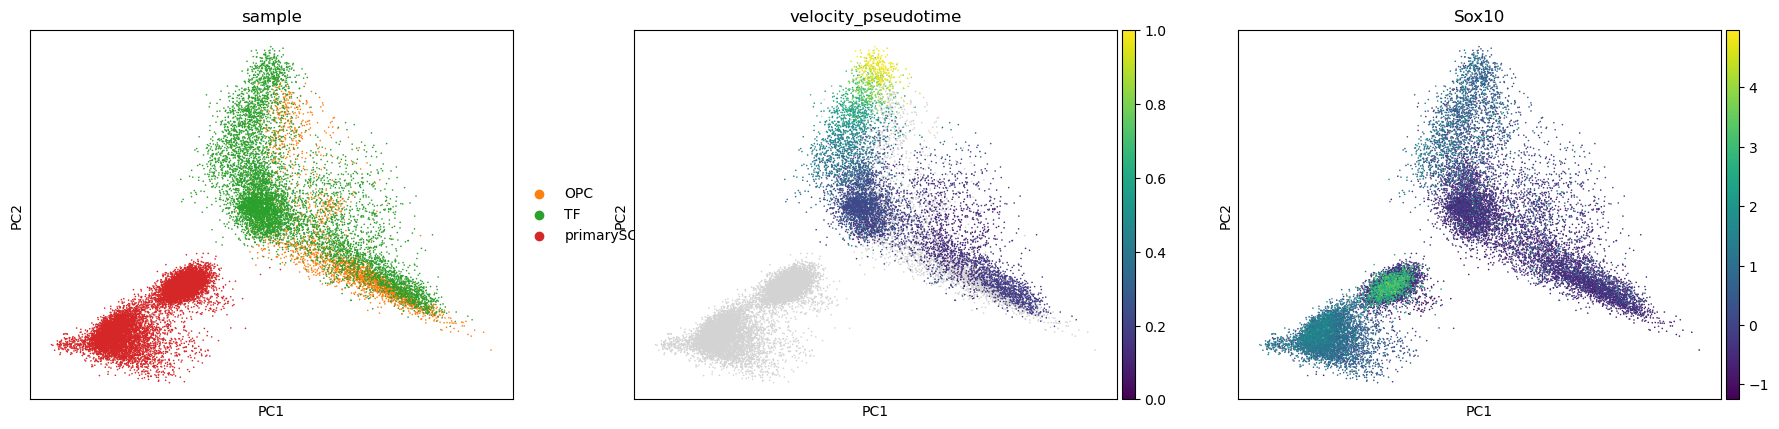

In [22]:
sc.pl.pca(adata[adata.obs['sample'] != "BMP4"],color = ["sample",'velocity_pseudotime','Sox10'])

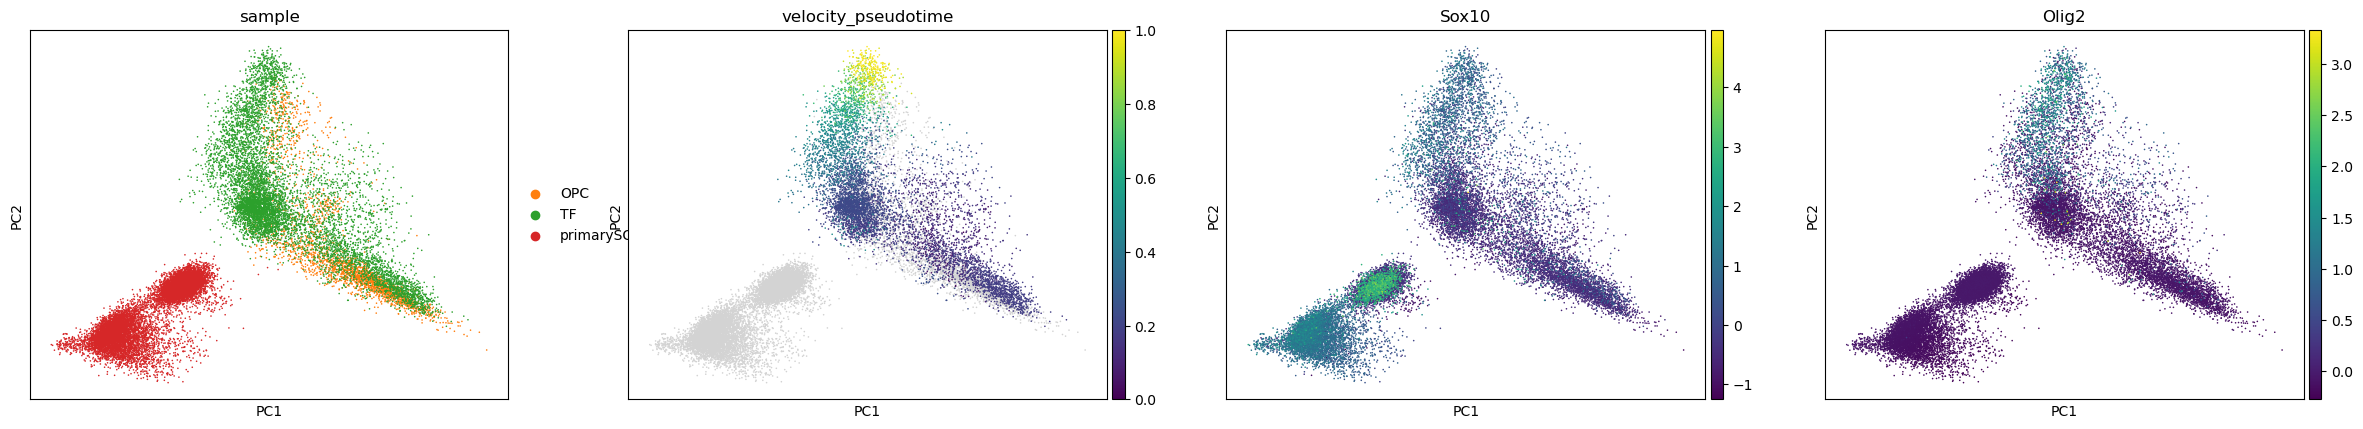

In [28]:
sc.pl.pca(adata[adata.obs['sample'] != "BMP4"],color = ["sample",'velocity_pseudotime','Sox10','Olig2'])

/Users/yy8/miniconda/envs/oor/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


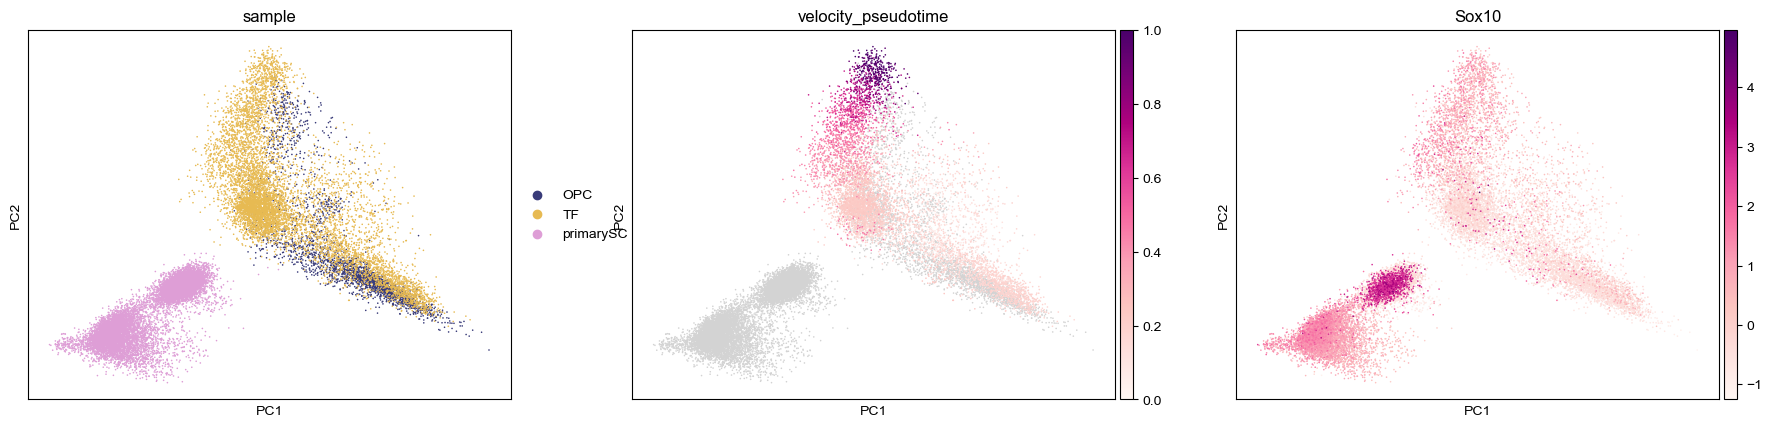

In [33]:
sc.pl.pca(adata[adata.obs['sample'] != "BMP4"],color = ["sample",'velocity_pseudotime','Sox10'],frameon=False,
         palette = "tab20b",cmap = "RdPu", save = "_invitro_TF_OPC_SC_velocity_sample_Sox10.pdf")

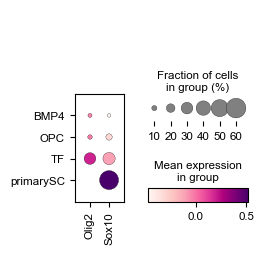

In [34]:
sc.pl.dotplot(adata,var_names = ["Olig2",'Sox10'],cmap = "RdPu", groupby = "sample", save = "invitro_TF_OPC_SC_BMP4_velocity_sample_Sox10_Olig2.pdf")

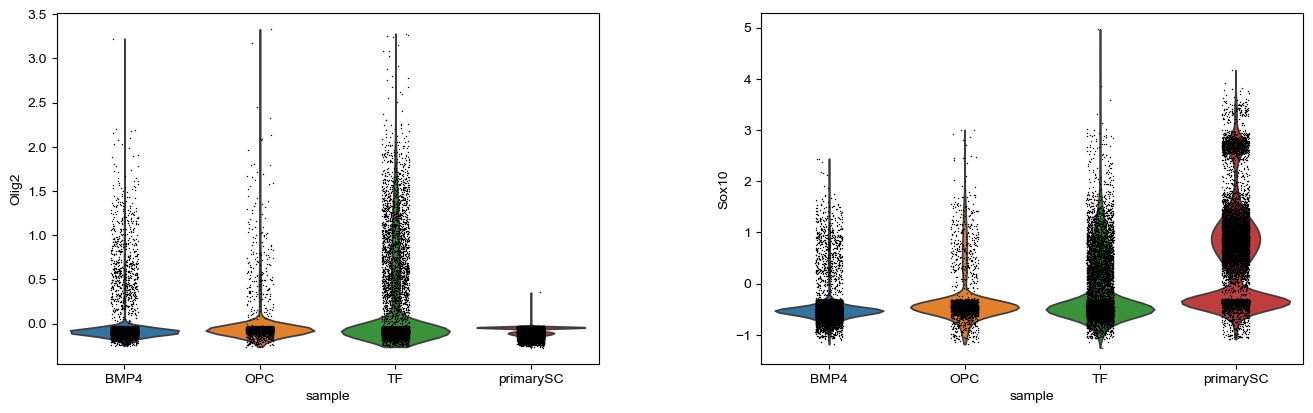

In [37]:
sc.pl.violin(adata,keys = ["Olig2",'Sox10'],cmap = "RdPu", groupby = "sample", save = "invitro_TF_OPC_SC_BMP4_velocity_sample_Sox10_Olig2.pdf")

In [14]:
adata.write_h5ad("dt_out/2_invitro_analysis/combined_adata_from_filtered_h5_withBasicQCregressout_PAGA_preprocessed_added_scvelo_13Feb2025.h5ad")